In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [67]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

## Perform API Calls

In [68]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 


In [69]:
city_data=[]
count=0
for city_name in cities:
    new_url= url + "&q=" + city_name
    response=requests.get(new_url)
    #Check Status is OK. (Status Code=200)
    if(response.status_code==200):
        response=response.json()
        count=count+1
        print(str(count)+". "+ city_name)
        city_data.append({"City": response["name"], 
                    "Temp" : response["main"]["temp"], 
                    "Cloudiness":response["clouds"]["all"], 
                    "Country": response["sys"]["country"],
                    "Date": response["dt"],
                    "Humidity": response["main"]["humidity"],
                    "Lat": response["coord"]["lat"],
                    "Lng": response["coord"]["lon"],
                    "Max Temp": response["main"]["temp_max"],
                    "Wind Speed": response["wind"]["speed"]})

print("Done")



1. naze
2. vila velha
3. kieta
4. busselton
5. qaanaaq
6. uray
7. atuona
8. punta arenas
9. paripiranga
10. east london
11. coburg
12. lorengau
13. sarkand
14. komsomolskiy
15. miri
16. stettler
17. port alfred
18. talnakh
19. geraldton
20. ermelo
21. hobart
22. barrow
23. rikitea
24. manokwari
25. longyearbyen
26. mut
27. salinopolis
28. kaitangata
29. verkhoyansk
30. haines junction
31. vaini
32. butaritari
33. hermanus
34. souillac
35. kapaa
36. lebu
37. plant city
38. esperance
39. bredasdorp
40. ushuaia
41. nelson bay
42. jamestown
43. morondava
44. albany
45. hithadhoo
46. muskogee
47. port augusta
48. tuktoyaktuk
49. sao joao da barra
50. broome
51. mar del plata
52. faanui
53. boa vista
54. saldanha
55. castro
56. tuatapere
57. nikolskoye
58. batagay-alyta
59. comodoro rivadavia
60. mataura
61. yulara
62. hualmay
63. new norfolk
64. ribeira grande
65. dikson
66. shiozawa
67. pimentel
68. aykhal
69. kisangani
70. dakoro
71. popondetta
72. kargil
73. medvezhyegorsk
74. avarua
75.

In [70]:
City_Data = pd.DataFrame(city_data)
City_Data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Temp,Wind Speed
0,Naze,75,NG,1535086800,94,5.43,7.07,73.40,73.40,0.36
1,Vila Velha,40,BR,1535083200,74,-3.71,-38.60,80.60,80.60,14.99
2,Kieta,44,PG,1535088390,100,-6.22,155.63,78.38,78.38,4.61
3,Busselton,0,AU,1535088391,100,-33.64,115.35,59.66,59.66,6.29
4,Qaanaaq,68,GL,1535088391,100,77.48,-69.36,35.90,35.90,5.28


In [71]:
print(len(city_data))

534


In [79]:
# Saving the data into a CSV file.  
City_Data.to_csv(output_data_file, sep=',', encoding='utf-8')

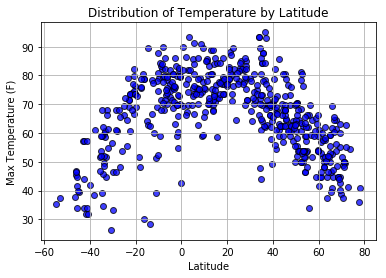

In [80]:
#Temperature (F) vs. Latitude
MaxTemperature = City_Data["Max Temp"]
Latitude = City_Data["Lat"]

Chart1 = plt.scatter(x=Latitude, y=MaxTemperature, marker="o", c= "blue", edgecolor="black", alpha=0.75)

plt.grid()
plt.title("Distribution of Temperature by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save Figure
plt.savefig("TemperatureVs.Latitude.png")
plt.show()

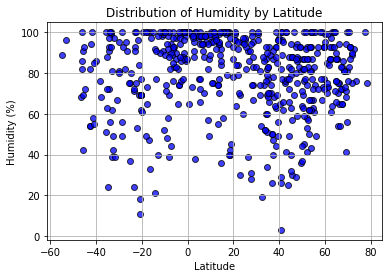

In [81]:
#Humidity (%) vs. Latitude
Humidity = City_Data["Humidity"]
Latitude = City_Data["Lat"]

Chart1 = plt.scatter(x=Latitude, y=Humidity, marker="o", c= "blue", edgecolor="black", alpha=0.75)

plt.grid()
plt.title("Distribution of Humidity by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save Figure
plt.savefig("HumidityVs.Latitude.png")
plt.show()

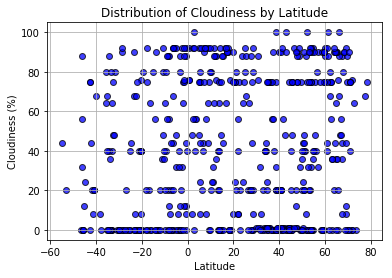

In [82]:
#Cloudiness (%) vs. Latitude
Cloudiness = City_Data["Cloudiness"]
Latitude = City_Data["Lat"]

Chart1 = plt.scatter(x=Latitude, y=Cloudiness, marker="o", c= "blue", edgecolor="black", alpha=0.75)

plt.grid()
plt.title("Distribution of Cloudiness by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save Figure
plt.savefig("CloudinessVs.Latitude.png")
plt.show()

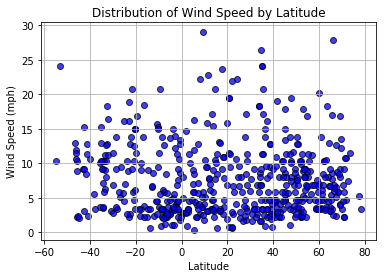

In [83]:
#Wind Speed (mph) vs. Latitude
WindSpeed = City_Data["Wind Speed"]
Latitude = City_Data["Lat"]

Chart1 = plt.scatter(x=Latitude, y=WindSpeed, marker="o", c= "blue", edgecolor="black", alpha=0.75)

plt.grid()
plt.title("Distribution of Wind Speed by Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save Figure
plt.savefig("WindSpeedVs.Latitude.png")
plt.show()